## EN3160 Assignment 3 on Neural Networks

Index Number - 210583B

Name - Sehara G.M.M.


Github Repo Link - https://github.com/MihiruthS/EN3160---Image-Processing-and-Machine-Vision/tree/main/Assignment%203

### Question 1

This is the listing one code without any change.

Training accuracy: 32.21%

Test accuracy: 32.42%

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/20, Loss: 0.9769272477030754
Epoch 2/20, Loss: 0.9498104813694954
Epoch 3/20, Loss: 0.9360707784891129
Epoch 4/20, Loss: 0.9275197123885155
Epoch 5/20, Loss: 0.9215851123929024
Epoch 6/20, Loss: 0.917183783352375
Epoch 7/20, Loss: 0.9137727932333947
Epoch 8/20, Loss: 0.9110469475984574
Epoch 9/20, Loss: 0.9088189463615417
Epoch 10/20, Loss: 0.9069665178656579
Epoch 11/20, Loss: 0.9054076056480408
Epoch 12/20, Loss: 0.9040807863473892
Epoch 13/20, Loss: 0.9029423637390137
Epoch 14/20, Loss: 0.9019594026207924
Epoch 15/20, Loss: 0.9011059067249299
Epoch 16/20, Loss: 0.9003609222173691
Epoch 17/20, Loss: 0.8997085150480271
Epoch 18/20, Loss: 0.8991352397203446
Epoch 19/20, Loss: 0.8986297198534012
Epoch 20/20, Loss: 0.8981833892464638


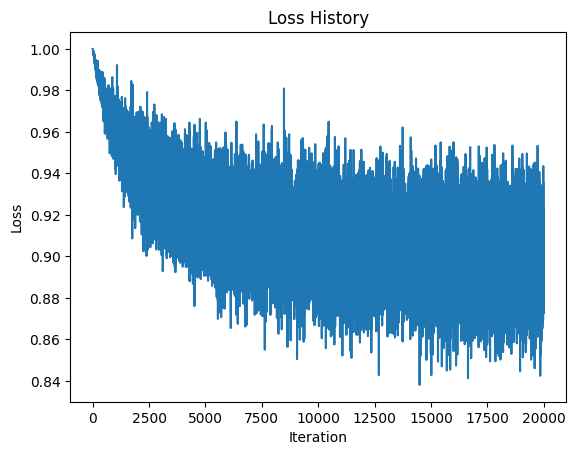

Training accuracy: 32.21%
Test accuracy: 32.42%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define Network Parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
K = 10  # Output size (number of classes in CIFAR-10)
std = 1e-5
# Initialize weights and biases
w = torch.randn(Din, K) * std  # One layer: directly map input to output
b = torch.zeros(K)
# Hyperparameters
iterations = 20
lr = 2e-6  # Learning rate
lr_decay = 0.9  # Learning rate decay
reg = 0  # Regularization
loss_history = []

# 3. Training Loop
for t in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)
        y_train_onehot = nn.functional.one_hot(labels, K).float()  # Convert labels to one-hot encoding

        # Forward pass
        y_pred = x_train.mm(w) + b  # Output layer activation

        # Loss calculation (Mean Squared Error with regularization)
        loss = (1 / Ntr) * torch.sum((y_pred - y_train_onehot) ** 2) + reg * torch.sum(w ** 2)
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        dy_pred = (2.0 / Ntr) * (y_pred - y_train_onehot)
        dw = x_train.t().mm(dy_pred) + reg * w
        db = dy_pred.sum(dim=0)

        # Parameter update
        w -= lr * dw
        b -= lr * db

    # Print loss for every epoch
    if t % 1 == 0:
        print(f"Epoch {t + 1}/{iterations}, Loss: {running_loss / len(trainloader)}")

    # Learning rate decay
    lr *= lr_decay

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)
        y_train_onehot = nn.functional.one_hot(labels, K).float()

        # Forward pass
        y_train_pred = x_train.mm(w) + b
        predicted_train = torch.argmax(y_train_pred, dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        y_test_onehot = nn.functional.one_hot(labels, K).float()

        # Forward pass
        y_test_pred = x_test.mm(w) + b
        predicted_test = torch.argmax(y_test_pred, dim=1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")

In the following code, I have manually calculated the cross entrophy loss.

Got an accuracy of 10%

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10, Average Loss: 2.3027444229125975
Epoch 2/10, Average Loss: 2.3027544703483582
Epoch 3/10, Average Loss: 2.3027578299045564
Epoch 4/10, Average Loss: 2.302721074581146
Epoch 5/10, Average Loss: 2.302777114868164
Epoch 6/10, Average Loss: 2.3027484993934633
Epoch 7/10, Average Loss: 2.302749633550644
Epoch 8/10, Average Loss: 2.3027834823131563
Epoch 9/10, Average Loss: 2.302720683813095
Epoch 10/10, Average Loss: 2.3027703602313996


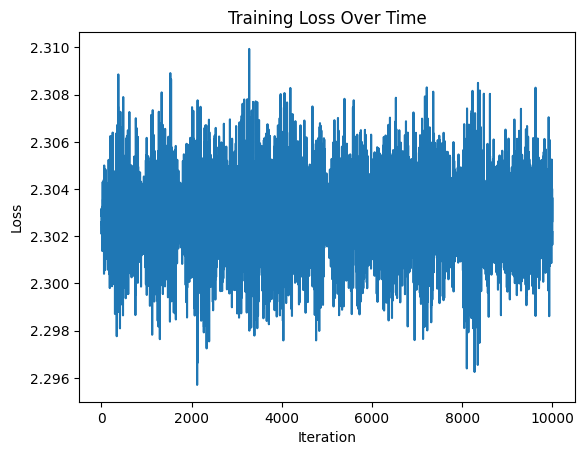

Training Accuracy: 10.00%
Testing Accuracy: 10.00%


In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Step 1: Data Loading and Transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
batch_size = 50
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
class_labels = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Step 2: Model Parameters
input_size = 3 * 32 * 32  # CIFAR-10 image size after flattening
hidden_layer_size = 100  # Hidden layer with 100 units
output_classes = 10  # Number of classes in CIFAR-10
weight_stddev = 1e-5

# Initialize weights and biases
w1 = torch.randn(input_size, hidden_layer_size) * weight_stddev
b1 = torch.zeros(hidden_layer_size)
w2 = torch.randn(hidden_layer_size, output_classes) * weight_stddev
b2 = torch.zeros(output_classes)

# Hyperparameters
num_epochs = 10
learning_rate = 0.001
regularization = 0
loss_record = []

# Function to compute cross-entropy loss manually
def compute_cross_entropy_loss(logits, targets):
    probabilities = torch.exp(logits) / torch.exp(logits).sum(dim=1, keepdim=True)
    selected_probs = probabilities[range(len(targets)), targets]
    loss_value = -torch.log(selected_probs).mean()
    return loss_value

# Step 3: Training Loop
for epoch in range(num_epochs):
    epoch_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.view(inputs.size(0), -1)

        # Forward pass
        z1 = inputs.mm(w1) + b1
        h1 = torch.sigmoid(z1)
        logits = h1.mm(w2) + b2

        # Loss calculation
        loss = compute_cross_entropy_loss(logits, labels)
        loss_record.append(loss.item())
        epoch_loss += loss.item()

        # Backpropagation
        probabilities = torch.exp(logits) / torch.exp(logits).sum(dim=1, keepdim=True)
        probabilities[range(len(labels)), labels] -= 1
        dy_pred = probabilities / len(labels)

        # Gradients for w2 and b2
        dw2 = h1.t().mm(dy_pred) + regularization * w2
        db2 = dy_pred.sum(dim=0)

        # Backpropagation through hidden layer
        dh1 = dy_pred.mm(w2.t())
        dz1 = dh1 * h1 * (1 - h1)

        # Gradients for w1 and b1
        dw1 = inputs.t().mm(dz1) + regularization * w1
        db1 = dz1.sum(dim=0)

        # Update parameters
        w1 -= learning_rate * dw1
        b1 -= learning_rate * db1
        w2 -= learning_rate * dw2
        b2 -= learning_rate * db2

    print(f"Epoch {epoch + 1}/{num_epochs}, Average Loss: {epoch_loss / len(train_loader)}")

# Step 4: Plot Loss History
plt.plot(loss_record)
plt.title("Training Loss Over Time")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# Step 5: Training Accuracy Calculation
train_correct = 0
train_total = 0
with torch.no_grad():
    for inputs, labels in train_loader:
        inputs = inputs.view(inputs.size(0), -1)
        z1 = inputs.mm(w1) + b1
        h1 = torch.sigmoid(z1)
        logits = h1.mm(w2) + b2
        predicted_labels = torch.argmax(logits, dim=1)

        train_total += labels.size(0)
        train_correct += (predicted_labels == labels).sum().item()

train_accuracy = 100 * train_correct / train_total
print(f"Training Accuracy: {train_accuracy:.2f}%")

# Step 6: Testing Accuracy Calculation
test_correct = 0
test_total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.view(inputs.size(0), -1)
        z1 = inputs.mm(w1) + b1
        h1 = torch.sigmoid(z1)
        logits = h1.mm(w2) + b2
        predicted_labels = torch.argmax(logits, dim=1)

        test_total += labels.size(0)
        test_correct += (predicted_labels == labels).sum().item()

test_accuracy = 100 * test_correct / test_total
print(f"Testing Accuracy: {test_accuracy:.2f}%")


In the following code, I used the built in functions for cross-entropy loss and backpropagation

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10, Loss: 2.0060250331163405
Epoch 2/10, Loss: 1.8495401202440263
Epoch 3/10, Loss: 1.798244108557701
Epoch 4/10, Loss: 1.767086590886116
Epoch 5/10, Loss: 1.7444705971479415
Epoch 6/10, Loss: 1.726047180056572
Epoch 7/10, Loss: 1.7111347260475158
Epoch 8/10, Loss: 1.6975405540466308
Epoch 9/10, Loss: 1.6855546867847442
Epoch 10/10, Loss: 1.6747590872049332


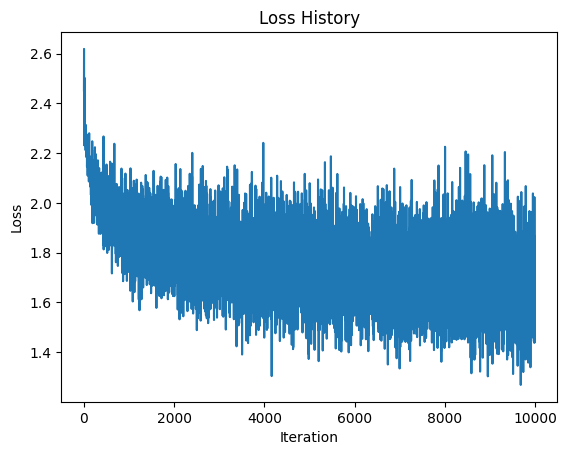

Training accuracy: 42.55%
Test accuracy: 41.92%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define Network Parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
H = 100  # Hidden layer size (new layer with 100 nodes)
K = 10  # Output size (number of classes in CIFAR-10)

# Xavier Initialization for weights and biases as nn.Parameter
w1 = nn.Parameter(torch.randn(Din, H) * (1.0 / Din ** 0.5))    # Weights from input layer to hidden layer
b1 = nn.Parameter(torch.zeros(H))               # Biases for the hidden layer
w2 = nn.Parameter(torch.randn(H, K) * (1.0 / H ** 0.5))      # Weights from hidden layer to output layer
b2 = nn.Parameter(torch.zeros(K))               # Biases for the output layer

# Hyperparameters
iterations = 10
lr = 0.001  # Increased learning rate
loss_history = []
criterion = nn.CrossEntropyLoss()

# Use an optimizer with momentum and weight decay (L2 regularization)
optimizer = optim.SGD([w1, b1, w2, b2], lr=lr, momentum=0.9, weight_decay=1e-4)

# 3. Training Loop
for t in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs = inputs.view(inputs.size(0), -1)  # Flatten the inputs

        # Forward pass
        z1 = inputs.mm(w1) + b1
        h1 = torch.sigmoid(z1)
        outputs = h1.mm(w2) + b2

        # Compute Cross-Entropy Loss
        loss = criterion(outputs, labels)
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        optimizer.zero_grad()  # Zero the gradients before backward pass
        loss.backward()
        optimizer.step()  # Update weights

    print(f"Epoch {t + 1}/{iterations}, Loss: {running_loss / len(trainloader)}")

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        inputs = inputs.view(inputs.size(0), -1)  # Flatten the inputs

        # Forward pass
        z1 = inputs.mm(w1) + b1
        h1 = torch.sigmoid(z1)
        outputs = h1.mm(w2) + b2
        predicted_train = torch.argmax(outputs, dim=1)

        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        inputs = inputs.view(inputs.size(0), -1)  # Flatten the inputs

        # Forward pass
        z1 = inputs.mm(w1) + b1
        h1 = torch.sigmoid(z1)
        outputs = h1.mm(w2) + b2
        predicted_test = torch.argmax(outputs, dim=1)

        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


### Question 02

LeNet-5 Model for MNIST Classification  
This code implements the LeNet-5 architecture using PyTorch to classify MNIST digit images. The model trains over 10 epochs, with training and test accuracies reported.

- **Architecture**: LeNet-5 with two convolutional layers followed by max pooling and three fully connected layers. ReLU activations are used throughout.
- **Dataset**: MNIST, normalized and loaded in batches for training and testing.
- **Optimizer and Loss**: Adam optimizer (learning rate = 0.001) with Cross-Entropy Loss.
- **Training and Testing**: Training accuracy is displayed after each epoch, with final test accuracy reported after all 10 epochs.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define the LeNet-5 architecture
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)  # Input: 1x28x28, Output: 6x28x28
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)  # Input: 6x14x14, Output: 16x10x10
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)  # 6x28x28 -> 6x14x14
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)  # 16x10x10 -> 16x5x5
        x = x.view(-1, 16 * 5 * 5)  # Flatten
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# Instantiate the model, define the loss function and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Training Accuracy: {train_accuracy:.2f}%")

# Testing the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Test Accuracy after {num_epochs} epochs: {test_accuracy:.2f}%")



Epoch [1/10], Loss: 0.1454, Training Accuracy: 92.94%
Epoch [2/10], Loss: 0.0192, Training Accuracy: 97.99%
Epoch [3/10], Loss: 0.0036, Training Accuracy: 98.48%
Epoch [4/10], Loss: 0.0137, Training Accuracy: 98.76%
Epoch [5/10], Loss: 0.0035, Training Accuracy: 99.07%
Epoch [6/10], Loss: 0.1456, Training Accuracy: 99.17%
Epoch [7/10], Loss: 0.0073, Training Accuracy: 99.31%
Epoch [8/10], Loss: 0.0005, Training Accuracy: 99.38%
Epoch [9/10], Loss: 0.0017, Training Accuracy: 99.46%
Epoch [10/10], Loss: 0.0009, Training Accuracy: 99.53%
Test Accuracy after 10 epochs: 98.91%


### Question 03

In [ ]:
# License: BSD
# Author: Sasank Chilamkurthy

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory

cudnn.benchmark = True
plt.ion()

In [ ]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'D:\Sem 5\Image Processing and Machine Vision\Github\EN3160---Image-Processing-and-Machine-Vision\Assignment 3\data\hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

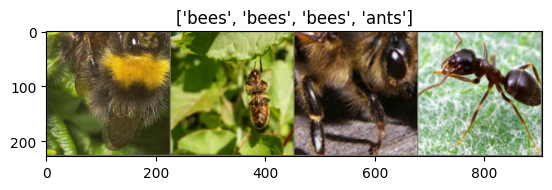

In [ ]:
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    # Create a temporary directory to save training checkpoints
    with TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')

        torch.save(model.state_dict(), best_model_params_path)
        best_acc = 0.0

        for epoch in range(num_epochs):
            print(f'Epoch {epoch}/{num_epochs - 1}')
            print('-' * 10)

            # Each epoch has a training and validation phase
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)
                if phase == 'train':
                    scheduler.step()

                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]

                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

                # deep copy the model
                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), best_model_params_path)

            print()

        time_elapsed = time.time() - since
        print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
        print(f'Best val Acc: {best_acc:4f}')

        # load best model weights
        model.load_state_dict(torch.load(best_model_params_path, weights_only=True))
    return model

In [ ]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

Finetuning the ConvNet

In [ ]:
model_ft = models.resnet18(weights='IMAGENET1K_V1')
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to ``nn.Linear(num_ftrs, len(class_names))``.
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\mihir/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:06<00:00, 7.05MB/s]


In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

Epoch 0/24
----------
train Loss: 0.6122 Acc: 0.6639
val Loss: 0.1601 Acc: 0.9477

Epoch 1/24
----------
train Loss: 0.6666 Acc: 0.7295
val Loss: 0.1800 Acc: 0.9150

Epoch 2/24
----------
train Loss: 0.5655 Acc: 0.7459
val Loss: 0.3266 Acc: 0.8497

Epoch 3/24
----------
train Loss: 0.4753 Acc: 0.8156
val Loss: 0.2508 Acc: 0.9085

Epoch 4/24
----------
train Loss: 0.5866 Acc: 0.7787
val Loss: 0.5275 Acc: 0.8170

Epoch 5/24
----------
train Loss: 0.5745 Acc: 0.7951
val Loss: 0.4162 Acc: 0.8693

Epoch 6/24
----------
train Loss: 0.5196 Acc: 0.7910
val Loss: 0.3538 Acc: 0.8497

Epoch 7/24
----------
train Loss: 0.3705 Acc: 0.8566
val Loss: 0.2851 Acc: 0.9085

Epoch 8/24
----------
train Loss: 0.3076 Acc: 0.8525
val Loss: 0.3344 Acc: 0.8562

Epoch 9/24
----------
train Loss: 0.3058 Acc: 0.8566
val Loss: 0.2843 Acc: 0.9085

Epoch 10/24
----------
train Loss: 0.3011 Acc: 0.8607
val Loss: 0.3079 Acc: 0.8824

Epoch 11/24
----------
train Loss: 0.3010 Acc: 0.8566
val Loss: 0.2776 Acc: 0.9216

Ep

c:\Users\mihir\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


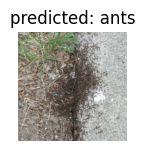

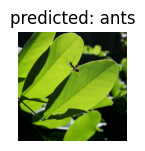

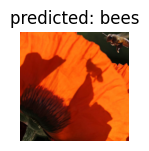

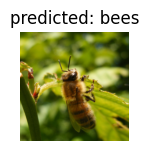

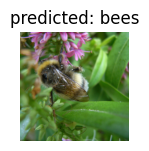

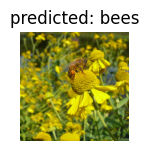

In [ ]:
visualize_model(model_ft)

ConvNet as fixed feature extractor

In [ ]:
model_conv = torchvision.models.resnet18(weights='IMAGENET1K_V1')
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

In [ ]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.7196 Acc: 0.6230
val Loss: 0.2416 Acc: 0.9150

Epoch 1/24
----------
train Loss: 0.4930 Acc: 0.7787
val Loss: 0.2760 Acc: 0.8889

Epoch 2/24
----------
train Loss: 0.4368 Acc: 0.7828
val Loss: 0.4782 Acc: 0.7974

Epoch 3/24
----------
train Loss: 0.4861 Acc: 0.8033
val Loss: 0.1874 Acc: 0.9412

Epoch 4/24
----------
train Loss: 0.4535 Acc: 0.8156
val Loss: 0.1572 Acc: 0.9608

Epoch 5/24
----------
train Loss: 0.4460 Acc: 0.8320
val Loss: 0.1630 Acc: 0.9542

Epoch 6/24
----------
train Loss: 0.5858 Acc: 0.7623
val Loss: 0.1642 Acc: 0.9608

Epoch 7/24
----------
train Loss: 0.3629 Acc: 0.8443
val Loss: 0.1614 Acc: 0.9477

Epoch 8/24
----------
train Loss: 0.3861 Acc: 0.8279
val Loss: 0.1801 Acc: 0.9346

Epoch 9/24
----------
train Loss: 0.4223 Acc: 0.8443
val Loss: 0.1751 Acc: 0.9477

Epoch 10/24
----------
train Loss: 0.3592 Acc: 0.8238
val Loss: 0.1742 Acc: 0.9346

Epoch 11/24
----------
train Loss: 0.3220 Acc: 0.8566
val Loss: 0.1776 Acc: 0.9477

Ep

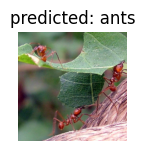

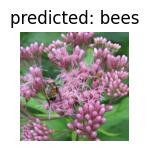

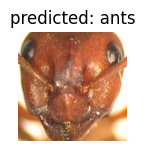

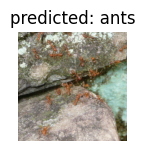

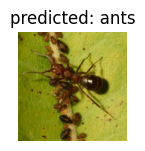

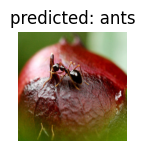

In [ ]:
visualize_model(model_conv)

plt.ioff()
plt.show()

**Fine-Tuning:**
- **Modify the Output Layer**: Replace the final layer of the pre-trained ResNet18 model to align with the number of classes in the new dataset (e.g., 2 classes for bees and ants).
- **Train All Layers**: All layers, including the pre-trained ones, are updated to better match the new data. This helps the model adapt to specific features of the new dataset.
- **Full Training Required**: The entire network undergoes training on the new data, updating weights across all layers.

**Feature Extraction:**
- **Only Change the Output Layer**: Like in fine-tuning, the final layer is adjusted to classify the new classes (2 classes).
- **Freeze Pre-Trained Layers**: All other layers retain their pre-trained weights, preserving the knowledge gained from ImageNet.
- **Train Only the Final Layer**: The model trains only the final layer on the new data, using the existing layers as fixed feature extractors. This applies ImageNet features directly to the new task.
- **Minimal Training Needed**: Only the final layer is trained, making this process quicker and less resource-intensive.
